In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from scipy.misc import imread
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
from imageio import imwrite, imread

In [12]:
path_data = '../all/'

# Data exploration

In [13]:
def show_images(list_names, path, columns, rows, img_size, crop=0):
    '''
    Show images with rows and columns
    list_names: name of images in a string array
    path: images' path
    columns: number of columns
    rows: number of rows
    img_size: images' size to show
    '''
    
    number_img = columns * rows
    index_list = range(0, len(list_names))
    # get random index
    random_idx = np.random.choice(index_list, number_img)
    
    fig = plt.figure(figsize=(12, 12))
    
    for i in range(0, number_img):
        img = imread(path + '/' + list_names[random_idx[i]])
        
        if crop != 0:
            seq = iaa.Sequential([
                iaa.Crop(px=(crop, crop, crop, crop), keep_size=False)
            ])
            img = seq.augment_image(img)
        
        fig.add_subplot(rows, columns, i + 1)
        plt.axis('off')
        plt.imshow(img)
    

In [14]:
def save_images(path, des_path, images_names, crop_size = None):
    '''
    Save images in a especific path
    path: images' path
    des_path: path where to save the images
    images_names: list of names of the images to preprocess and save
    '''
    for name in images_names:
            # Read image
            img = imread(path + '/' + name)
            
            if crop_size != None:
                seq = iaa.Sequential([
                iaa.Crop(px=(crop_size, crop_size, crop_size, crop_size), keep_size=False)])
                # Apply crop to the image
                img = seq.augment_image(img)
                
            # Save image
            imwrite(des_path + '/' + name, img)

In [21]:
# Get name of all images
img_names = os.listdir(path_data + 'images_training_rev1')

/home/aldopedraza/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


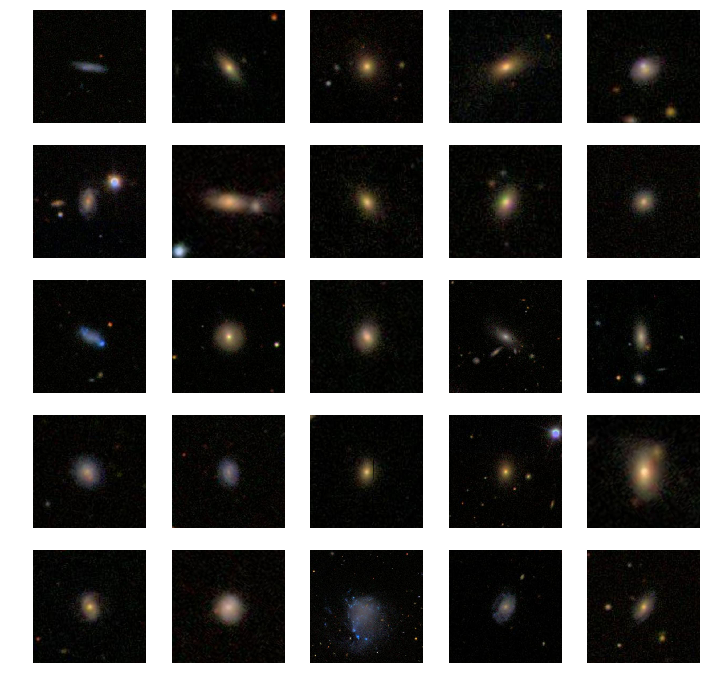

In [22]:
show_images(img_names, path_data + 'images_training_rev1', 5, 5, 50)

/home/aldopedraza/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


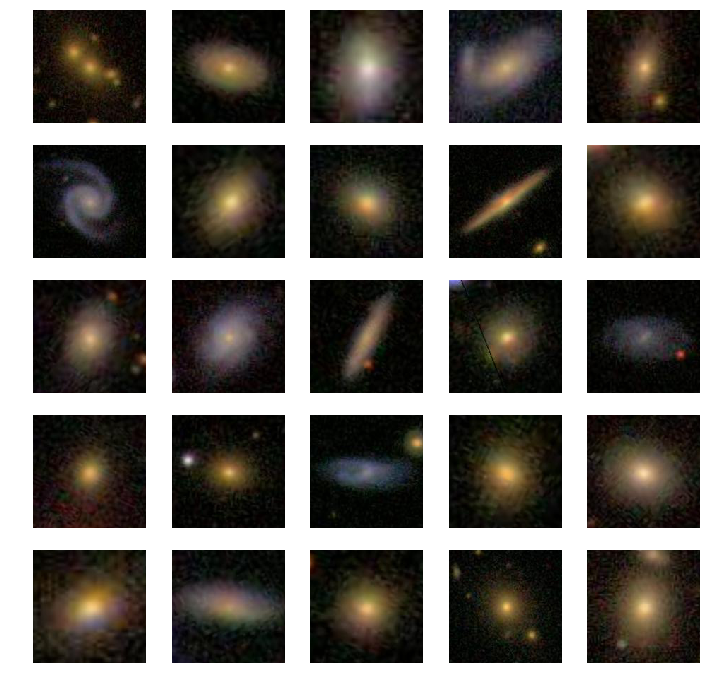

In [23]:
show_images(img_names, path_data + 'images_training_rev1', 5, 5, 50, 132)

In [24]:
data_label = pd.read_csv(path_data + 'training_solutions_rev1.csv')

In [25]:
data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 38 columns):
GalaxyID     61578 non-null int64
Class1.1     61578 non-null float64
Class1.2     61578 non-null float64
Class1.3     61578 non-null float64
Class2.1     61578 non-null float64
Class2.2     61578 non-null float64
Class3.1     61578 non-null float64
Class3.2     61578 non-null float64
Class4.1     61578 non-null float64
Class4.2     61578 non-null float64
Class5.1     61578 non-null float64
Class5.2     61578 non-null float64
Class5.3     61578 non-null float64
Class5.4     61578 non-null float64
Class6.1     61578 non-null float64
Class6.2     61578 non-null float64
Class7.1     61578 non-null float64
Class7.2     61578 non-null float64
Class7.3     61578 non-null float64
Class8.1     61578 non-null float64
Class8.2     61578 non-null float64
Class8.3     61578 non-null float64
Class8.4     61578 non-null float64
Class8.5     61578 non-null float64
Class8.6     61578 non-null f

In [26]:
data_label.head(10)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.000000,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.000000,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.000000,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,100122,0.738832,0.238159,0.023009,0.000000,0.238159,0.000000,0.238159,0.000000,0.238159,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,100123,0.462492,0.456033,0.081475,0.000000,0.456033,0.000000,0.456033,0.000000,0.456033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,100128,0.687783,0.288344,0.023873,0.000000,0.288344,0.069098,0.219246,0.000000,0.288344,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,100134,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.021751,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894
9,100143,0.269843,0.730157,0.000000,0.730157,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.168728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
data_label.iloc[0]

GalaxyID     100008.000000
Class1.1          0.383147
Class1.2          0.616853
Class1.3          0.000000
Class2.1          0.000000
Class2.2          0.616853
Class3.1          0.038452
Class3.2          0.578401
Class4.1          0.418398
Class4.2          0.198455
Class5.1          0.000000
Class5.2          0.104752
Class5.3          0.512101
Class5.4          0.000000
Class6.1          0.054453
Class6.2          0.945547
Class7.1          0.201463
Class7.2          0.181684
Class7.3          0.000000
Class8.1          0.000000
Class8.2          0.027226
Class8.3          0.000000
Class8.4          0.027226
Class8.5          0.000000
Class8.6          0.000000
Class8.7          0.000000
Class9.1          0.000000
Class9.2          0.000000
Class9.3          0.000000
Class10.1         0.279952
Class10.2         0.138445
Class10.3         0.000000
Class11.1         0.000000
Class11.2         0.092886
Class11.3         0.000000
Class11.4         0.000000
Class11.5         0.000000
C

In [28]:
data_label.iloc[0][1:4].sum()
data_label.iloc[0][14:16].sum()

0.9999999999999999

# Split data into training and test

In [29]:
X_train, X_test, _, _ = train_test_split(img_names, img_names, test_size=0.3)

In [30]:
# Get id from image names
id_X_train = [int(id.split('.')[0]) for id in X_train]
id_X_eval = [int(id.split('.')[0]) for id in X_test]

# Split evaluation data into test and validation
size = int(len(id_X_eval) / 2)
id_X_test = id_X_eval[:size]
id_X_val = id_X_eval[size:]

In [31]:
y_train = data_label[data_label.GalaxyID.isin(id_X_train)]
y_test = data_label[data_label.GalaxyID.isin(id_X_test)]
y_val = data_label[data_label.GalaxyID.isin(id_X_val)]

In [32]:
# Change id to string
y_train['GalaxyID'] = y_train['GalaxyID'].apply(lambda x: str(x))
y_test['GalaxyID'] = y_test['GalaxyID'].apply(lambda x: str(x))
y_val['GalaxyID'] = y_val['GalaxyID'].apply(lambda x: str(x))

# Get numpy values
y_train = y_train.values
y_test = y_test.values
y_val = y_val.values

# Save labels
np.save(path_data + 'y_train', y_train)
np.save(path_data + 'y_test', y_test)
np.save(path_data + 'y_val', y_val)

names_train = y_train[:, 0] + '.jpg'
names_test = y_test[:, 0] + '.jpg'
names_val = y_val[:, 0] + '.jpg'

# Save preprocess images
save_images(path_data + 'images_training_rev1', 
            path_data + 'preprocess_img_train',
            names_train,
            132)
save_images(path_data + 'images_training_rev1', 
            path_data + 'preprocess_img_test',
            names_test,
            132)
save_images(path_data + 'images_training_rev1', 
            path_data + 'preprocess_img_val',
            names_val,
            132)

/home/aldopedraza/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/aldopedraza/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/aldopedraza/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [16]:
train = np.load(path_data + 'y_train.npy')
test = np.load(path_data + 'y_test.npy')
val = np.load(path_data + 'y_val.npy')

In [19]:
names_train = train[:, 0] + '.jpg'
names_test = test[:, 0] + '.jpg'
names_val = val[:, 0] + '.jpg'

In [24]:
train_test_names = np.concatenate((names_train, names_test), axis=0)
all_data_names = np.concatenate((train_test, names_val), axis=0)

In [28]:
train_test = np.concatenate((train, test), axis=0)
all_data = np.concatenate((train_test, val), axis=0)

In [31]:
np.save(path_data + 'y_train_test.npy', train_test)
np.save(path_data + 'y_all_data.npy', all_data)

In [27]:
save_images(path_data + 'images_training_rev1', 
            path_data + 'train_test_img',
            train_test_names,
            132)
save_images(path_data + 'images_training_rev1', 
            path_data + 'all_data_img',
            all_data_names,
            132)

In [26]:
all_data_names.shape

(61578,)

In [9]:
# Get name of test images for kaggle submition
img_names_test_sub = os.listdir(path_data + 'images_test_rev1')

In [10]:
save_images(path_data + 'images_test_rev1', path_data + 'sub_test_img', img_names_test_sub, 132)